In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)






In [2]:
# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_data, clinical_data,
                            how='left', on='Mouse ID')

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_group = combined_data_df.groupby(["Drug","Timepoint"])
tumor_mean = tumor_group["Tumor Volume (mm3)"].mean()

tumor_mean_df = pd.DataFrame({"Tumor Volume (mm3)":tumor_mean})

# Convert to DataFrame - MUST do this in order to later run Scatterplot
tumor_mean_df = tumor_mean_df.reset_index()


# Preview DataFrame
tumor_mean_df.head(5)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error Mean (SEM) Tumor Volume Data Grouped by Drug and Timepoint  
tumor_group = combined_data_df.groupby(["Drug","Timepoint"])
tumor_sem = tumor_group["Tumor Volume (mm3)"].sem()

tumor_sem_df = pd.DataFrame({"Tumor Volume (mm3)":tumor_sem})

# Convert to DataFrame - MUST do this in order to later run Scatterplot
tumor_sem_df = tumor_sem_df.reset_index()


# Preview DataFrame
tumor_sem_df.head(5)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames - switch rows and columns
tumor_mean_pivot = tumor_mean_df.pivot(index="Timepoint",columns="Drug")["Tumor Volume (mm3)"]
tumor_mean_pivot

# Preview that Reformatting worked

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [6]:
tumor_sem_pivot = tumor_sem_df.pivot(index="Timepoint",columns="Drug")["Tumor Volume (mm3)"]
tumor_sem_pivot.head(5)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


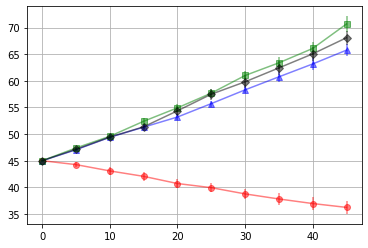

<Figure size 432x288 with 0 Axes>

In [7]:
# Generate the Plot (with Error Bars)
plt.errorbar(tumor_mean_pivot.index,tumor_mean_pivot["Capomulin"],yerr = tumor_sem_pivot["Capomulin"], fmt = '-', marker = 'o',color="r",
             alpha = 0.5, label="Capomulin")
plt.errorbar(tumor_mean_pivot.index,tumor_mean_pivot["Infubinol"],yerr = tumor_sem_pivot["Infubinol"],fmt = '-', marker = '^',color="b",
             alpha = 0.5, label="Infubinol")
plt.errorbar(tumor_mean_pivot.index,tumor_mean_pivot["Ketapril"],yerr = tumor_sem_pivot["Ketapril"],fmt = '-', marker = 's',color="g",
             alpha = 0.5, label="Ketapril")
plt.errorbar(tumor_mean_pivot.index,tumor_mean_pivot["Placebo"],yerr = tumor_sem_pivot["Placebo"],fmt = '-', marker = 'D',color="black",
             alpha = 0.5, label="Placebo")
plt.grid()

plt.show()

# Save the Figure
plt.savefig("figure1.png")

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
tumor_group = combined_data_df.groupby(["Drug","Timepoint"])
tumor_metastatic_mean = tumor_group["Metastatic Sites"].mean()

tumor_met_mean_df = pd.DataFrame({"Tumor Volume (mm3)":tumor_mean})

# Convert to DataFrame - MUST do this in order to later run Scatterplot
tumor_met_mean_df = tumor_mean_df.reset_index()


# Preview DataFrame
tumor_mean_df.head(5)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_group = combined_data_df.groupby(["Drug","Timepoint"])
meta_sem = tumor_group["Metastatic Sites"].sem()

meta_sem_df = pd.DataFrame({"Metastatic Sites":meta_sem})

# Convert to DataFrame - MUST do this in order to later run Scatterplot
meta_sem_df = meta_sem_df.reset_index()


# Preview DataFrame
meta_sem_df.head(5)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [10]:
# Minor Data Munging to Re-Format the Data Frames - switch rows and columns
meta_sem_pivot = meta_sem_df.pivot(index="Timepoint",columns="Drug")["Metastatic Sites"]
tumor_sem_pivot

# Preview that Reformatting worked

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


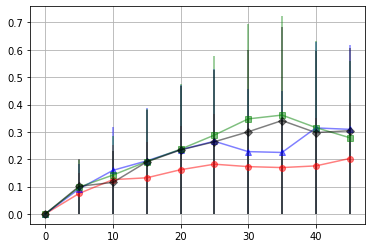

<Figure size 432x288 with 0 Axes>

In [11]:
# Generate the Plot (with Error Bars)
plt.errorbar(meta_sem_pivot.index,meta_sem_pivot["Capomulin"],yerr = meta_sem_pivot["Capomulin"], fmt = '-', marker = 'o',color="r",
             alpha = 0.5, label="Capomulin")
plt.errorbar(meta_sem_pivot.index,meta_sem_pivot["Infubinol"],yerr = meta_sem_pivot["Infubinol"],fmt = '-', marker = '^',color="b",
             alpha = 0.5, label="Infubinol")
plt.errorbar(meta_sem_pivot.index,meta_sem_pivot["Ketapril"],yerr = meta_sem_pivot["Ketapril"],fmt = '-', marker = 's',color="g",
             alpha = 0.5, label="Ketapril")
plt.errorbar(meta_sem_pivot.index,meta_sem_pivot["Placebo"],yerr = meta_sem_pivot["Placebo"],fmt = '-', marker = 'D',color="black",
             alpha = 0.5, label="Placebo")
plt.grid()

plt.show()


# Save the Figure
plt.savefig("figure2.png")


# Show the Figure



In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)


# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mice_group = combined_data_df.groupby(["Drug","Timepoint"])
mice_count = mice_group["Mouse ID"].count()

mice_count_df = pd.DataFrame({"Mouse ID":mice_count})

# Convert to DataFrame - MUST do this in order to later run Scatterplot
mice_count_df = mice_count_df.reset_index()


# Preview DataFrame
mice_count_df.head(5)
# Convert to DataFrame

# Preview DataFrame

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


# Summary Bar Graph

In [13]:
# Calculate the percent changes for each drug
tumor_pct_change =  (tumor_mean_pivot.loc[45]-tumor_mean_pivot.loc[0])/tumor_mean_pivot.loc[0]*100
tumor_pct_change

# Display the data to confirm

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [15]:
# Store all Relevant Percent Changes into a Tuple
percent_tuple = (tumor_pct_change["Capomulin"],tumor_pct_change["Infubinol"],tumor_pct_change["Ketapril"],tumor_pct_change["Placebo"]
                )

percent_tuple

(-19.475302667894173, 46.12347172785187, 57.028794686606076, 51.29796048315153)

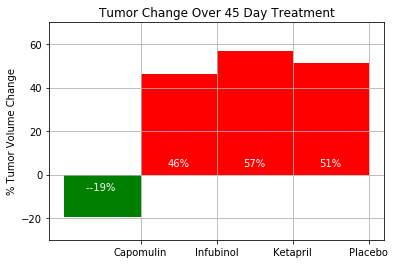

In [19]:
# Store all Relevant Percent Changes into a Tuple
pct_changes = (tumor_pct_change["Capomulin"],
               tumor_pct_change["Infubinol"],
               tumor_pct_change["Ketapril"],
               tumor_pct_change["Placebo"])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(pct_changes))
width = 1
rectsPass = ax.bar(ind[0], pct_changes[0], width, color='green')
rectsFail = ax.bar(ind[1:], pct_changes[1:], width, color='red')

# Orient widths. Add labels, tick marks, etc.
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")

# Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Save the Figure
fig.savefig("Figure1.png")

# Show the Figure
fig.show()